# All Results for the SNLI dataset

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from IPython.display import display, HTML 
from lr.analysis.util import get_ts_from_results_folder 
from lr.analysis.util import get_rho_stats_from_result_list
from lr.stats.h_testing import get_ks_stats_from_p_values_compared_to_uniform_dist
import seaborn as sns

In [2]:
sns.set()

## Get Results Functions

In [3]:
def get_results(base_path, test_repetitions, stat):
    all_stats = []
    batchs = range(1, test_repetitions + 1)
    for i in tqdm(batchs):
        sta  = get_ts_from_results_folder(path=base_path + "{}/".format(i),
                                                     stat=stat)
        all_stats.append(sta)
    return pd.concat(all_stats,1)

## SNLI Results

In [4]:
filter_ = [0.0, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0]
p_xgb_snli = get_results("results/snli/xgb/syn_p_h/batch", test_repetitions=5, stat="paired_t_p_value")
p_xgb_snli = p_xgb_snli.loc[filter_]
p_bert_snli = get_results("results/snli/bert_base/syn_p_h/batch", test_repetitions=5, stat="paired_t_p_value")

100%|██████████| 5/5 [00:00<00:00, 56.96it/s]


## MNLI Results

## P-values Plot

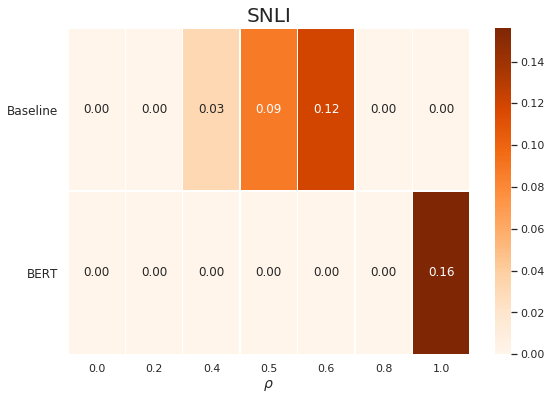

In [5]:
p_bert_snli = p_bert_snli.min(1)
p_bert_snli.name = 'BERT'
p_xgb_snli = p_xgb_snli.min(1)
p_xgb_snli.name = 'Baseline'
p_values_snli = pd.concat([p_xgb_snli, p_bert_snli],1).transpose()

fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(p_values_snli, annot=True, fmt=".2f", linewidths=.5, ax=ax, cmap="Oranges");
ax.set_xlabel(r"$\rho$", fontsize=14);
ax.set_yticklabels(p_values_snli.index.values, rotation=360, ha='right',fontsize=12);
ax.set_title("SNLI", fontsize=20);